Imoprtando as Bibliotecas do python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

Data points from a xor port 

In [2]:
y = np.array([[-1],[1],[1],[-1]])
x = np.array([[-1,-1],[-1,1], [1,-1], [1,1]])

for i in range(0,4,1):
    print(x[i][0], ',', x[i][1], '|', y[i][0])

-1 , -1 | -1
-1 , 1 | 1
1 , -1 | 1
1 , 1 | -1


Plotando os dados e como podemos ver eles não são linearmente separáveis.

Text(0, 0.5, 'X_2')

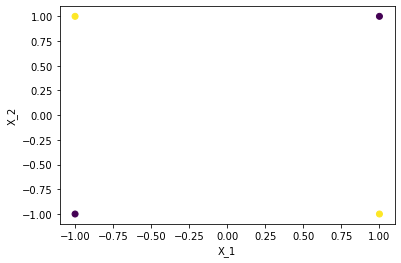

In [3]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.xlabel('X_1')
plt.ylabel('X_2')

# Introdução a função de kernel

y = 1 -> pontos amarelos
y = 0 -> pontos roxos

Como é possível visualizar, não é possível separar os pontos de forma linear, logo para isso é necessário utilizar uma função kernel
a função kernel escolhida foi a polinomial.

$$k(X,X_{i}) = (1 + X^{T}.X_{i})^{2}$$
Logo, expandindo temos:
$$k(x,x_{i}) = 1 + x_{1}^{2}.x_{i1}^{2} + 2x_{1}x_{2}x_{i1}x_{i2} + x_{2}^{2}x_{i2}^{2} + 2x_{1}x_{i1} + 2x_{2}x_{i2}$$

Separando os termos como o produto escalar entre dois vetores de seis dimensões temos:

$$\phi(x) = (1,x_{1}^{2},\sqrt 2 x_{1}x_{2}, x_{2}^2,\sqrt 2x_{1},\sqrt 2x_{2})^T$$

$$\phi(x_{i}) = (1,x_{i1}^{2},\sqrt 2 x_{i1}x_{i2}, x_{i2}^2,\sqrt 2x_{i1},\sqrt 2x_{i2})^T$$

Utilizando o truque do kernel o novo espaço pode ser mapeado como:
$$k(X_{i},X_{j}) = (1 + <X_{i}, X_{j}>)^{2}$$


# Mudança do espaço do problema
A mudança do espaço do problema o torna linearmente separável e isso é feito através da função kernel.
A partir da função do Kernel é impressa a matriz do Kernel.


In [4]:
lenght = len(x)
K = np.zeros((lenght, lenght))

for i in range(0,lenght,1):
    for j in range(0,lenght):
       prod = (1 + np.dot(x[i],x[j])) * (1 + np.dot(x[i],x[j]))
       K[i][j] = prod
         
print("Matriz do Kernel")
print(K)

print("***************************************************************")

Y = np.zeros((lenght, lenght))

for i in range(0,lenght,1):
    for j in range(0,lenght):
       Y[i][j] = y[i] * y[j]
       
print("Matriz do produto das saídas")
print(Y)


Matriz do Kernel
[[9. 1. 1. 1.]
 [1. 9. 1. 1.]
 [1. 1. 9. 1.]
 [1. 1. 1. 9.]]
***************************************************************
Matriz do produto das saídas
[[ 1. -1. -1.  1.]
 [-1.  1.  1. -1.]
 [-1.  1.  1. -1.]
 [ 1. -1. -1.  1.]]


# Calculando o sistema de equações

O sistema de equações para achar os $$\alpha_{i}$$ é dado por 
$$K.(Y.\alpha^{T})= 1$$
[K] é a matriz do Kernel
[Y] é a matriz das saídas composta por $$y_{i}.y_{j} $$ e 1 é uma matriz quadrada de uns.

In [5]:
#Multiplicando a matriz e para montar o sistema
E_Matrix = np.zeros((lenght, lenght + 1))

for i in range(0, lenght):
    count = 0
    for j in range(0, lenght):
        E_Matrix[i][j] = K[i][j] * Y[j][i]
        count += 1
        
    E_Matrix[i][count] = 1

print("\n Matriz do sistema de equações\n", E_Matrix)


 Matriz do sistema de equações
 [[ 9. -1. -1.  1.  1.]
 [-1.  9.  1. -1.  1.]
 [-1.  1.  9. -1.  1.]
 [ 1. -1. -1.  9.  1.]]


# Operações para achar os multiplicadores de lagrange

In [6]:
#Salvando as linhas

for i in range(0, len(E_Matrix)):
    
    E_Matrix[i] = E_Matrix[i] / E_Matrix[i][i]

    for j in range (0, len(E_Matrix)):       
        if (j != i ):   
            E_Matrix[j] = E_Matrix[j] - E_Matrix[i] * E_Matrix[j][i]
            
print("Resultado do sistema de equações\n")

print("\nalfa 1 = ", E_Matrix[0][4])
print("\nalfa 2 = ", E_Matrix[1][4])
print("\nalfa 3 = ", E_Matrix[2][4])
print("\nalfa 4 = ", E_Matrix[3][4])

alfa_i = np.array([E_Matrix[0][4], E_Matrix[1][4], E_Matrix[2][4], E_Matrix[3][4]])

Resultado do sistema de equações


alfa 1 =  0.125

alfa 2 =  0.125

alfa 3 =  0.125

alfa 4 =  0.12499999999999997


# Achando o hiperplano ótimo
O hiperplano ótimo é dado pela equação
$$W^{T}.\phi(x) = 0$$

onde

$$W = \sum_{i=1}^{4} \alpha_{i}.y_{i}.\phi(x_{i})$$

e

$$\phi(x_{i}) = (1,x_{i1}^{2},\sqrt 2 x_{i1}x_{i2}, x_{i2}^2,\sqrt 2x_{i1},\sqrt 2x_{i2})^T$$

In [7]:
#Calculando phi
phi_xi = np.zeros((len(x), 6))

for i in range(0,len(x)):
    phi_xi[i] = [1, x[i][0] * x[i][0], mt.sqrt(2) * x[i][0] * x[i][1], x[i][1] * x[i][1], mt.sqrt(2) * x[i][0], mt.sqrt(2) * x[i][1]]
 
    
print(phi_xi)

[[ 1.          1.          1.41421356  1.         -1.41421356 -1.41421356]
 [ 1.          1.         -1.41421356  1.         -1.41421356  1.41421356]
 [ 1.          1.         -1.41421356  1.          1.41421356 -1.41421356]
 [ 1.          1.          1.41421356  1.          1.41421356  1.41421356]]


In [8]:
#Multiplicando alfa_i por yi temos

W = np.zeros((1,len(phi_xi[0])))

for i in range(0,lenght):
    W = W + alfa_i[i] * y[i][0] * phi_xi[i]

print(W)

[[ 2.77555756e-17  2.77555756e-17 -7.07106781e-01  2.77555756e-17
   2.77555756e-17  2.77555756e-17]]


# Equação do hiperplano de separação

$$y(x1, x2) = W^{T}.\phi(x)$$

Logo:

$$y(x1, x2) = -x1.x2$$

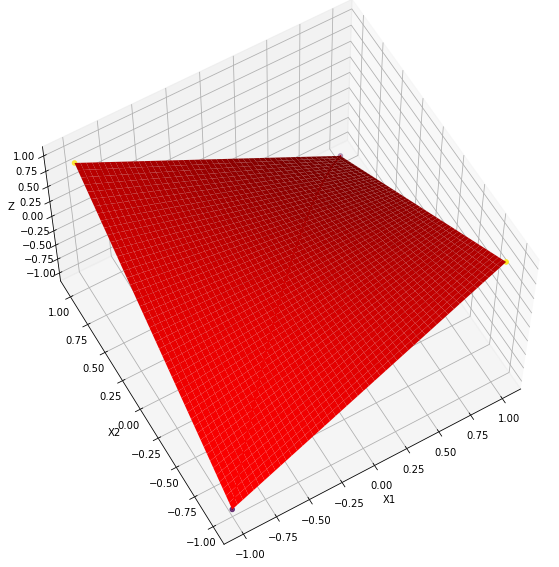

In [13]:
from mpl_toolkits.mplot3d import axes3d
#Plotando a superfície de separação
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

ax.scatter3D(x[:,0], x[:, 1], y, c = y)

x1 = np.linspace(-1,1)
x2 = np.linspace(-1,1)
y1 = -x1 * x2
X1, X2 = np.meshgrid(x1,x2)

Z1 = -(X1 * X2)

ax.view_init(60, -120)

ax.plot3D(x1, x2, y1, 'red')

ax.plot_surface(X1, X2, Z1, color="red")

plt.show()

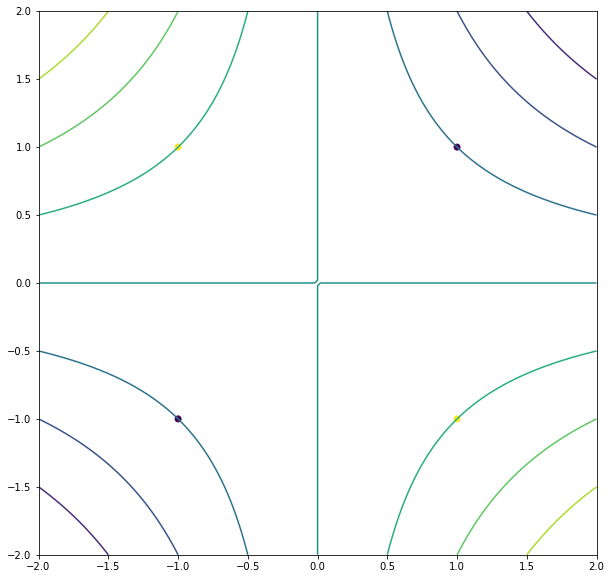

In [55]:
from mpl_toolkits.mplot3d import axes3d
#Plotando a superfície de separação
fig = plt.figure(figsize=(10,10))

x1 = np.linspace(-2,2,100)
x2 = np.linspace(-2,2,100)
y1 = -x1 * x2

X1, X2 = np.meshgrid(x1,x2)
Z1 = -(X1 * X2)

plt.scatter(x[:,0], x[:,1], c= y)
plt.contour(X1, X2, Z1,)

plt.show()